In [1]:
from snAPI.Main import *
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
class HH_T3:
    def __init__(self,sn,filename):
        sn.getDevice()
        sn.getFileDevice(filename)
        sn.initDevice(MeasMode.T3)
        self.t_resol=sn.deviceConfig['Resolution']/1000 #in ns
        sn.raw.measure()
        self.data = sn.raw.getData()
        self.channels=sn.raw.channel(self.data)
        self.dTimes=sn.raw.dTime_T3(self.data)[np.where(self.channels!=64)]*self.t_resol
        self.dataChannels=self.channels[np.where(self.channels!=64)]
        sn.unfold.measure()
        self.absTimes=sn.unfold.getData()[0]/1e3 # in ns
        self.df=pd.DataFrame(np.array([self.dTimes,self.absTimes,self.dataChannels]).T,columns=['dTimes','absTimes','Channels'])
        sn.closeDevice()
    def Gate(self,T):
        return self.df[(self.df['dTimes']>T)]
    def Counts(self,ch):
        return np.size(self.df['dTimes'][self.df['Channels']==ch]) 

In [3]:
def binned(times,t_res, t0, tf):
        edges=np.arange(t0,tf,t_res)
        return np.histogram(times,edges)
def edges2bins(edges):
    return edges[:-1]+np.diff(edges)/2

In [4]:
sn=snAPI()

In [24]:
after='C:/Users/Mikel/Documents/Data analysis/Narrow field/Data/APD/ANN155_A_Ba_Quartz_box_after_degas/Filter0/default.ptu'
before='C:/Users/Mikel/Documents/Data analysis/Narrow field/Data/APD/ANN155_A_Ba_Quartz_box_before_degas/Filter0/default.ptu'

In [25]:
aft=HH_T3(sn,filename=after)
bef=HH_T3(sn,filename=before)

Text(0, 0.5, 'Counts')

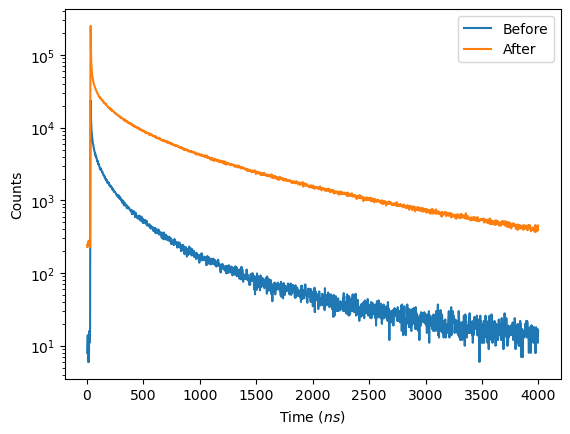

In [26]:
binning=10
counts0,edges=binned(bef.df['dTimes'],bef.t_resol*binning,0,4000)
counts1,edges=binned(aft.df['dTimes'],aft.t_resol*binning,0,4000)

bins=edges2bins(edges)
plt.plot(bins,counts0,label='Before')
plt.plot(bins,counts1,label='After')

plt.yscale('log')
plt.legend()
#plt.xscale('log')
plt.xlabel('Time ($ns$)')
plt.ylabel('Counts')

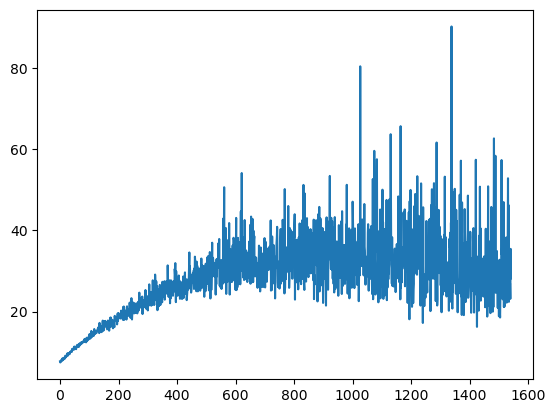

In [27]:
plt.plot((counts1/counts0)[20:])